In [48]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
# importamos deepcopy para copiar objetos
from copy import deepcopy

In [49]:
# cargamos las imagenes:
def load_images(filenames):
    return [imageio.imread(filename) for filename in filenames]

def find_centers(images):
    centers = []
    rets = []
    for image in images:
        # como nuestro patron son circulos 4x6 tenemos que buscar los centros
        # de los circulos
        ret, corners = cv2.findCirclesGrid(image, (4, 6), None) # no entiendo porque ret es false, si encuentra los circulos!!!!!!!!
        centers.append(corners)
        rets.append(ret)
    return centers, rets

def show_centers(images, centers, rets):
    # mostramos una matriz con las 23 imagenes y los centros encontrados
    images2 = deepcopy(images)
    for i, image in enumerate(images2):
        # pintamos en rojo los centros encontrados
        cv2.drawChessboardCorners(image, (4, 6), centers[i], rets[i])
    
    # now we show the images in a matrix, 4x6
    fig, ax = plt.subplots(4, 6, figsize=(20, 10))
    for i, image in enumerate(images2):
        ax[i//6, i%6].imshow(image)
        ax[i//6, i%6].axis('off')
        # ponemos el numero de la imagen
        ax[i//6, i%6].set_title(f'Image {i+1}')
    plt.show()
    return images2


def get_circle_centers(patron_shape, dx, dy):
    # patron_shape: (4, 6)
    # dx, dy: distancia entre centros
    points = []
    for i in range(patron_shape[1]):
        for j in range(patron_shape[0]):
            points.append([dx*i, dy*j])
    return np.array(points, dtype=np.float32)






In [50]:
filenames = [f'calibracion/img{i}.jpg' for i in range(1,24)]
images = load_images(filenames)

/var/folders/11/8n3x035j1rngnz1l98ysm7vm0000gn/T/ipykernel_97247/2350875062.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


In [51]:
centers, rets = find_centers(images)
print(rets) # ret = True si se encontraron los centros
print(centers) # centros encontrados

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
[array([[[ 55.691185, 114.94551 ]],

       [[145.90439 , 124.822716]],

       [[232.29556 , 133.83284 ]],

       [[314.57156 , 142.94977 ]],

       [[393.76434 , 151.44482 ]],

       [[ 47.26531 , 199.16992 ]],

       [[140.02127 , 207.46538 ]],

       [[228.7771  , 214.94052 ]],

       [[313.26663 , 222.4953  ]],

       [[394.5194  , 229.57973 ]],

       [[ 38.285213, 287.43506 ]],

       [[133.85136 , 293.7544  ]],

       [[225.0987  , 299.7868  ]],

       [[311.965   , 305.64313 ]],

       [[395.35202 , 311.18033 ]],

       [[ 28.56046 , 381.27762 ]],

       [[127.24704 , 385.4625  ]],

       [[221.36003 , 389.48267 ]],

       [[310.5735  , 393.61923 ]],

       [[396.1096  , 397.48804 ]]], dtype=float32), array([[[ 58.739826, 116.94015 ]],

       [[148.81163 , 126.43845 ]],

       [[235.10826 , 135.0985

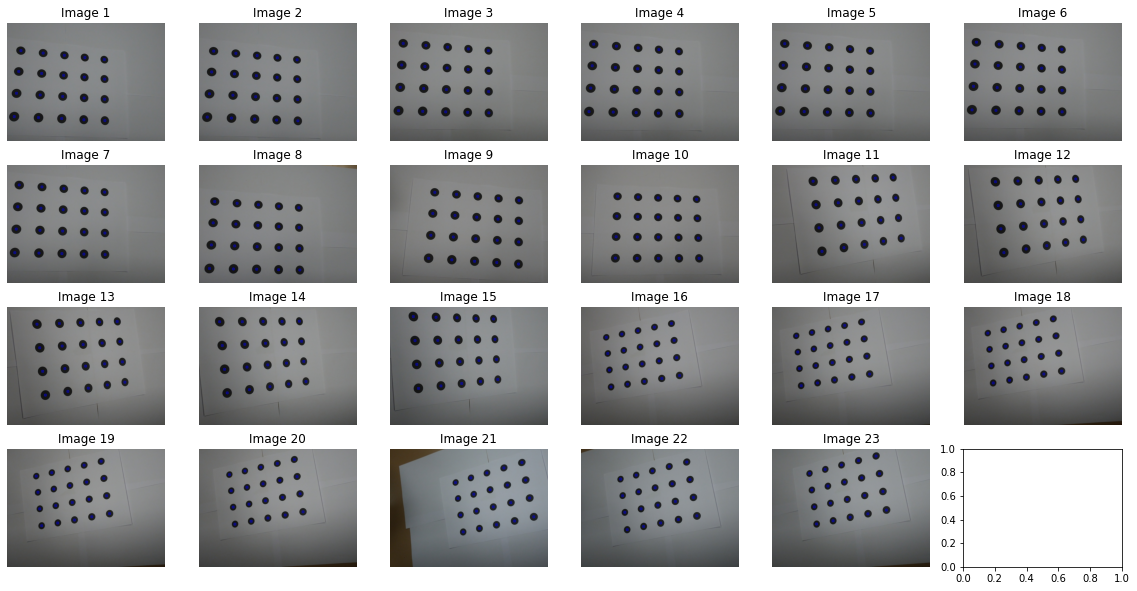

In [52]:
images2 = show_centers(images, centers, rets)

In [53]:
# now obtain the real centers
real_points = get_circle_centers((4, 6), 20, 20)

# centers:
valid_centers = [centers[i] for i in range(len(rets)) if not rets[i]]  # CAMBIAR AQUI: deberia ser rets[i] == True pero no se porque todos son False
num_valid_images = len(valid_centers)

# obtain their real points
real_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

# convert the corners list to array
image_points = np.asarray(valid_centers, dtype=np.float32)

# now we calibrate the camera
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(real_points, image_points, images[0].shape[:2], None, None)

extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

print('Calibration matrix:')
print('-------------------')
print('Intrinsic parameters:')
print(intrinsics+'\n')
print('Distortion coefficients:')
print(dist_coeffs+'\n')
print('Extrinsic parameters:')
print(extrinsics+'\n')
print('RMS:')
print(rms+'\n')

error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:3408: error: (-210:Unsupported format or combination of formats) objectPoints should contain vector of vectors of points of type Point3f in function 'collectCalibrationData'


In [ ]:
if __name__ == '__main__':

    filenames = ['center/center_{:03d}.jpg'.format(i) for i in range(10)]

    images = load_images(filenames)

    centers, rets = find_centers(images)

    # visualize the centers
    images2 = show_centers(images, centers, rets)

    # obtain the centers of the circles
    real_points = get_circle_centers((4, 6), 1, 1)

    # now we calibrate the camera
    # we need to obtain the camera matrix and the distortion coefficients
    # we use the function cv2.calibrateCamera
    valid_centers = [centers[i] for i in range(len(rets)) if rets[i]]
    num_valid_images = len(valid_centers)
    # obtain their real points
    real_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

    # convert the corners list to array
    image_points = np.asarray(valid_centers, dtype=np.float32)

    # now we calibrate the camera
    rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(real_points, image_points, images[0].shape[:2], None, None)

    extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

    print('Calibration matrix:')
    print('-------------------')
    print('Intrinsic parameters:')
    print(intrinsics+'\n')
    print('Distortion coefficients:')
    print(dist_coeffs+'\n')
    print('Extrinsic parameters:')
    print(extrinsics+'\n')
    print('RMS:')
    print(rms+'\n')